# Credit Card Fraud Detection

In [1]:
import pandas as pd
import numpy as np

In [2]:
url= "creditcard.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#no of 0s and 1s in "class" section

In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Data is highly unbalanced , more than 90% data is not-Fraud

### So,we need to do Under Sampling so that our Model can make better predictions.

## 0- Normal Transaction

## 1- Fraudulent Transaction

In [10]:
# Separating the Data for further Analysis

legit = df[df.Class == 0]

fraud = df[df.Class == 1]

In [13]:
legit.shape

(284315, 31)

In [14]:
fraud.shape

(492, 31)

# Under-Sampling: Built a sample dataset from original dataset

no of fraud transactions-492

#So what to do:

we need to take 492 values randomly from Legit Transaction.

after this will have a dataset with 
                 
  -492-Legit Transactions

and 
           
  -492-Fraud Transactions

In [15]:
legit_sample= legit.sample(n=492)

In [17]:
# Concatenate two Dtaframes(legit_sample and fraud)

In [19]:
df_new = pd.concat([legit_sample,fraud],axis=0)

In [20]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
244704,152454.0,-0.251123,1.037536,-0.753734,-0.558291,0.331908,-0.697891,0.351771,0.607353,-0.075889,...,-0.267655,-0.931255,0.199431,0.584921,-0.533761,0.098082,0.073755,0.008073,8.91,0
180343,124500.0,-1.297839,-0.172262,-0.470047,0.100801,1.563491,-1.767660,0.821914,-0.273597,0.046818,...,0.208838,1.183185,0.860995,-0.175437,-0.157396,-0.100717,0.509763,0.185488,13.45,0
62158,50158.0,-0.925480,0.837760,1.852104,0.134710,0.366517,-0.139948,1.003195,0.109942,-0.267348,...,-0.041520,-0.092609,-0.291848,0.044586,0.695859,-0.434177,0.032457,0.055461,37.28,0
132479,80003.0,0.789921,-1.106316,0.871156,0.369516,-1.302417,0.128324,-0.545363,0.204605,1.345234,...,-0.100489,-0.491449,-0.049019,0.140852,-0.045425,0.954680,-0.061359,0.042678,203.96,0
222423,142963.0,-0.830390,0.028331,0.551670,-1.189592,1.481638,0.231372,0.947621,-0.016198,0.169677,...,-0.123570,-0.226225,-0.098079,-0.110201,0.236623,-0.101193,0.121380,-0.036595,74.44,0


In [21]:
df_new.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [23]:
df_new['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [24]:
df_new.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91465.428862,-0.003347,-0.073255,0.022068,-0.118730,0.115380,0.034263,-0.107411,0.048351,-0.021773,...,0.029921,0.001440,-0.018925,-0.048610,0.001852,-0.010554,-0.010336,0.015557,0.016742,82.458415
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Plotting Histograms

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
#df.hist(bins=50,figsize=(20,15))

## Train Test Splitting

In [27]:
from sklearn.model_selection import train_test_split

In [30]:
train_set,test_set = train_test_split(df_new,test_size=0.3,random_state=42)

In [31]:
print(f"Rows in train set:{len(train_set)}\n Rows in test set:{len(test_set)}\n")

Rows in train set:688
 Rows in test set:296



In [40]:
train_set['Class'].value_counts()

1    346
0    342
Name: Class, dtype: int64

In [41]:
test_set['Class'].value_counts()

0    150
1    146
Name: Class, dtype: int64

In [42]:
#Class values are Equally distributed to train set and test set

In [43]:
test_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42756,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.00,1
190320,128783.0,1.922706,-0.265819,-1.707146,1.063308,0.774155,0.603887,0.054909,0.057458,0.504742,...,0.186075,0.656188,-0.195434,-0.333053,0.523696,-0.363551,-0.004184,-0.059181,63.37,0
111690,72327.0,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,238.90,1
243949,152143.0,1.712847,-0.804614,-1.452235,-0.068005,0.498205,1.085024,-0.211315,0.329822,0.925401,...,-0.016576,0.027262,0.121903,-1.623825,-0.278756,0.013654,-0.002068,-0.065792,110.00,0
112910,72851.0,-0.720704,0.787134,0.395774,0.833174,0.254979,0.117276,0.155820,0.551537,-0.123370,...,-0.174760,-0.596089,-0.064393,-1.054398,0.098038,-0.379073,0.200415,0.002751,48.98,0


In [44]:
test_set.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,...,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,84977.618243,-2.272148,1.695155,-3.403001,2.042021,-1.423465,-0.623289,-2.655209,0.472894,-1.231194,...,0.424141,-0.034667,-0.056033,-0.063462,0.047057,-0.008483,0.152546,0.054329,110.700912,0.493243
std,48475.295100,5.282504,3.561764,6.039816,3.103789,4.092655,1.799253,5.433338,4.404935,2.242236,...,2.590331,1.119120,1.203411,0.551636,0.640068,0.472402,1.010996,0.404631,231.623647,0.500801
min,472.000000,-29.200329,-7.196980,-30.177317,-5.047408,-21.225810,-5.566870,-31.197329,-37.353443,-9.481456,...,-9.110423,-8.887017,-15.981649,-2.028024,-3.536716,-1.159116,-7.263482,-1.796363,0.000000,0.000000
25%,41297.000000,-2.938075,-0.198165,-4.876194,-0.211021,-1.675987,-1.447756,-3.045948,-0.161172,-2.270184,...,-0.145198,-0.574913,-0.241924,-0.411900,-0.298463,-0.291913,-0.035642,-0.039696,1.980000,0.000000
50%,76867.000000,-0.752291,0.884582,-1.375980,0.998071,-0.423104,-0.601511,-0.616252,0.192996,-0.732977,...,0.161765,-0.003124,-0.035932,-0.011496,0.093055,-0.052126,0.056712,0.045321,22.185000,0.000000
75%,129571.750000,0.945611,2.699364,0.190843,4.033310,0.614467,0.141181,0.246391,0.840786,0.207852,...,0.678653,0.590971,0.164789,0.334430,0.429577,0.264694,0.492631,0.219303,99.992500,1.000000
max,172734.000000,2.170987,16.497472,3.157632,11.885313,11.095089,5.760059,5.431271,19.168327,3.273004,...,27.202839,4.158895,5.303607,1.032611,2.103868,2.745261,2.300164,1.779364,2125.870000,1.000000


In [48]:
df_new = train_set.copy()

## Correlations

In [53]:
#df_new.corr().T

In [54]:
corr_matrix = df_new.corr() # checking class correlations with other independent features.

In [55]:
corr_matrix['Class'].sort_values(ascending=False)

Class     1.000000
V4        0.719475
V11       0.678573
V2        0.504469
V19       0.278549
V20       0.144406
V21       0.119068
Amount    0.065819
V26       0.063084
V28       0.062608
V27       0.057928
V8        0.046933
V25       0.041353
V23       0.018034
V22       0.013859
V13      -0.053327
Time     -0.076034
V24      -0.086859
V15      -0.093287
V6       -0.366507
V5       -0.386207
V1       -0.424114
V18      -0.438991
V7       -0.465048
V9       -0.549305
V17      -0.552004
V3       -0.569885
V16      -0.596846
V10      -0.624175
V12      -0.676915
V14      -0.752469
Name: Class, dtype: float64

## Plotting Graphs

In [56]:
from pandas.plotting import scatter_matrix
attributes = ["Class","Amount","Time"]

array([[<AxesSubplot:xlabel='Class', ylabel='Class'>,
        <AxesSubplot:xlabel='Amount', ylabel='Class'>,
        <AxesSubplot:xlabel='Time', ylabel='Class'>],
       [<AxesSubplot:xlabel='Class', ylabel='Amount'>,
        <AxesSubplot:xlabel='Amount', ylabel='Amount'>,
        <AxesSubplot:xlabel='Time', ylabel='Amount'>],
       [<AxesSubplot:xlabel='Class', ylabel='Time'>,
        <AxesSubplot:xlabel='Amount', ylabel='Time'>,
        <AxesSubplot:xlabel='Time', ylabel='Time'>]], dtype=object)

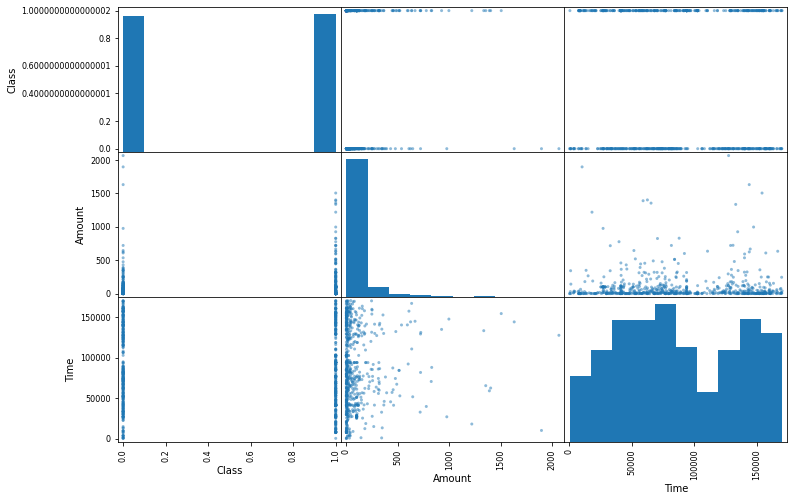

In [57]:
scatter_matrix(df[attributes],figsize=(12,8))

### Splitting Features and Labels

In [58]:
df_new = train_set.drop("Class",axis=1)
df_labels = train_set["Class"].copy()

In [59]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
169868,119903.0,2.061424,-1.179464,-2.705171,-1.938007,1.820689,3.169609,-0.843306,0.710361,-0.659592,...,0.180457,-0.017657,-0.356116,0.274024,0.688115,-0.198905,-0.413528,-0.027830,-0.050541,83.82
8845,12095.0,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,...,-0.207759,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,30.39
151007,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,...,2.812241,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.504646,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00
263012,160758.0,-1.366065,1.433233,0.028713,-1.049107,-0.041335,0.123801,-0.144509,0.801819,-0.024623,...,-0.142088,-0.125918,-0.565540,0.096327,0.059178,-0.719782,0.144114,-0.248451,0.090414,23.99


In [60]:
df_labels.head()

169868    0
8845      1
151007    1
6427      1
263012    0
Name: Class, dtype: int64

## Selecting a desired Model for Project

In [61]:
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [62]:
#model = LogisticRegression(tol = 0.1, solver = "lbfgs")
model = GaussianNB()

### Training the Logistic Regression Model with Training Data

In [63]:
model.fit(df_new,df_labels)

GaussianNB()

## Model Evaluation

### Accuracy Scores

In [64]:
from sklearn.metrics import accuracy_score
df_prediction = model.predict(df_new)
training_data_accuracy = accuracy_score(df_prediction,df_labels)

In [65]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.8648255813953488


In [66]:
from sklearn.model_selection import cross_val_predict
df_labels_prediction = cross_val_predict(model,df_new,df_labels,cv=3)

In [67]:
df_labels_prediction

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [68]:
#Calculating confusion matrix

In [69]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(df_labels,df_labels_prediction) 

array([[333,   9],
       [ 92, 254]], dtype=int64)

In [72]:
#confusion matrix---tells us difference between actual and predicted values

In [73]:
#confusion_matrix(df_labels,df_labels)----------this is the C.M. for perfect predictions

In [74]:
# Precision and Recall

In [75]:
from sklearn.metrics import precision_score , recall_score

In [76]:
#This is my precision score
precision_score(df_labels , df_labels_prediction)

0.9657794676806084

In [77]:
#This is my recall score
recall_score(df_labels , df_labels_prediction)

0.7341040462427746

In [78]:
#F1 Score--------it is harmonic mean of Precision and Recall

In [79]:
from sklearn.metrics import f1_score

In [80]:
f1_score(df_labels , df_labels_prediction)

0.8341543513957307

In [81]:
# check Classification Report

In [82]:
from sklearn.metrics import classification_report
print(classification_report(df_labels,df_prediction))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       342
           1       0.98      0.75      0.85       346

    accuracy                           0.86       688
   macro avg       0.89      0.87      0.86       688
weighted avg       0.89      0.86      0.86       688



In [85]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
169868,119903.0,2.061424,-1.179464,-2.705171,-1.938007,1.820689,3.169609,-0.843306,0.710361,-0.659592,...,0.180457,-0.017657,-0.356116,0.274024,0.688115,-0.198905,-0.413528,-0.027830,-0.050541,83.82
8845,12095.0,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,...,-0.207759,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,30.39
151007,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,...,2.812241,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.504646,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00
263012,160758.0,-1.366065,1.433233,0.028713,-1.049107,-0.041335,0.123801,-0.144509,0.801819,-0.024623,...,-0.142088,-0.125918,-0.565540,0.096327,0.059178,-0.719782,0.144114,-0.248451,0.090414,23.99


In [86]:
df_labels.head(10)

169868    0
8845      1
151007    1
6427      1
263012    0
281144    1
38228     0
143333    1
199896    1
205191    0
Name: Class, dtype: int64

In [94]:
print(df_new.iloc[6])#38228

Time      39302.000000
V1            1.312899
V2           -0.791870
V3           -0.168825
V4           -0.863257
V5           -0.484245
V6           -0.012985
V7           -0.552019
V8           -0.030353
V9           -0.645238
V10           0.587950
V11          -1.054224
V12          -1.133849
V13          -0.124990
V14          -0.084337
V15           1.097785
V16           1.093020
V17           0.198112
V18          -1.277762
V19           0.443677
V20           0.180109
V21           0.297629
V22           0.680010
V23          -0.299188
V24          -0.884006
V25           0.666208
V26           0.045465
V27           0.002282
V28           0.009578
Amount       79.000000
Name: 38228, dtype: float64


In [95]:
a = model.predict(([[39302,1.19303062213624,-0.234031019929713,0.564732368886103,-0.211228821400384,-0.680901156803264,-0.270388929064433,-0.485009202862015,0.201279722140703,0.353567612212306,-0.0456258683760474,1.44296891950105,0.219142426833454,-1.43791251702133,0.646471344229157,0.963295235612352,0.378855379390862,-0.252709081796197,-0.192766469349997,-0.0306637476315078,-0.177014452317068,-0.0705328183677447,-0.266181592669561,0.129634298187718,0.0278675753879606,-0.0355527394368712,0.922083725647683,-0.0678534553301745,-0.00714629221753893,3.79]]))

In [96]:
if a==0:
    print("not-fraud")
else:
    print("fraud")

not-fraud


### Testing the Model on Test dataset

In [97]:
X_test = test_set.drop("Class",axis=1)
Y_test = test_set["Class"].copy()

In [98]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
42756,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,-0.046170,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.00
190320,128783.0,1.922706,-0.265819,-1.707146,1.063308,0.774155,0.603887,0.054909,0.057458,0.504742,...,-0.123455,0.186075,0.656188,-0.195434,-0.333053,0.523696,-0.363551,-0.004184,-0.059181,63.37
111690,72327.0,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,1.003350,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,238.90
243949,152143.0,1.712847,-0.804614,-1.452235,-0.068005,0.498205,1.085024,-0.211315,0.329822,0.925401,...,-0.122023,-0.016576,0.027262,0.121903,-1.623825,-0.278756,0.013654,-0.002068,-0.065792,110.00
112910,72851.0,-0.720704,0.787134,0.395774,0.833174,0.254979,0.117276,0.155820,0.551537,-0.123370,...,0.171727,-0.174760,-0.596089,-0.064393,-1.054398,0.098038,-0.379073,0.200415,0.002751,48.98


In [99]:
Y_test.head()

42756     1
190320    0
111690    1
243949    0
112910    0
Name: Class, dtype: int64

### Testing the Model with Testing Data

In [100]:
#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression(tol = 0.1, solver = 'lbfgs')
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_test,Y_test)

GaussianNB()

In [101]:
from sklearn.metrics import accuracy_score
X_test_prediction = model1.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [102]:
print('Accuracy on training data:',testing_data_accuracy)

Accuracy on training data: 0.8716216216216216


In [103]:
from sklearn.model_selection import cross_val_predict
Y_test_prediction = cross_val_predict(model1,X_test,Y_test,cv=3)

In [104]:
Y_test_prediction

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [105]:
# confusion matrix

In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
confusion_matrix(Y_test,Y_test_prediction)

array([[149,   1],
       [ 37, 109]], dtype=int64)

In [108]:
from sklearn.metrics import precision_score , recall_score

In [109]:
precision_score(Y_test,Y_test_prediction)

0.990909090909091

In [110]:
recall_score(Y_test,Y_test_prediction)

0.7465753424657534

In [111]:
from sklearn.metrics import f1_score

In [112]:
f1_score(Y_test,Y_test_prediction)

0.8515625

In [113]:
#check classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_prediction))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89       150
           1       0.99      0.75      0.85       146

    accuracy                           0.87       296
   macro avg       0.90      0.87      0.87       296
weighted avg       0.89      0.87      0.87       296



In [114]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
42756,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,-0.046170,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.00
190320,128783.0,1.922706,-0.265819,-1.707146,1.063308,0.774155,0.603887,0.054909,0.057458,0.504742,...,-0.123455,0.186075,0.656188,-0.195434,-0.333053,0.523696,-0.363551,-0.004184,-0.059181,63.37
111690,72327.0,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,1.003350,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,238.90
243949,152143.0,1.712847,-0.804614,-1.452235,-0.068005,0.498205,1.085024,-0.211315,0.329822,0.925401,...,-0.122023,-0.016576,0.027262,0.121903,-1.623825,-0.278756,0.013654,-0.002068,-0.065792,110.00
112910,72851.0,-0.720704,0.787134,0.395774,0.833174,0.254979,0.117276,0.155820,0.551537,-0.123370,...,0.171727,-0.174760,-0.596089,-0.064393,-1.054398,0.098038,-0.379073,0.200415,0.002751,48.98


In [116]:
Y_test.head()

42756     1
190320    0
111690    1
243949    0
112910    0
Name: Class, dtype: int64

In [120]:
b= model1.predict(([[41233,-10.6457996485752,5.9183066586857,-11.6710425949575,8.80736917876038,-7.97550136587277,-3.58680634405361,-13.6167970541448,6.42816934590602,-7.36845129274034,-12.8881582878915,6.85495311388866,-13.2116950297251,1.03561234332246,-13.7789556397675,1.04044835530024,-11.2903278082585,-20.5780220491922,-7.54782411219534,3.11847976563045,-0.0461701790327979,2.57196959291347,0.206809359357246,-1.66780140024191,0.558418754024331,-0.0278978765982558,0.354253781525514,0.273328726801416,-0.152908080809092,0]]))

In [121]:
if b==0:
    print("not-fraud")
else:
    print("fraud")

fraud


## Done

# (* , *)